## 1 Exercise: Generate random data
### The idea is to learn how to generate random data following a gaussian distribution with different variances. Moreover we will generate a specific outlier in order to study how it affects a linear regression assuming different metrics.

[2.28400092 2.2663914  2.49587192 2.4720917  2.13383532 2.13925427
 2.40325554 2.85110514 2.14511794 2.79695095 2.2309136  2.95569541
 2.57952908 2.9987453  2.0724759  2.02895435 2.48082556 2.09775044
 2.30246246 5.        ]


(array([3., 3., 4., 1., 3., 1., 0., 1., 1., 2., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([2.02895435, 2.12798921, 2.22702406, 2.32605892, 2.42509377,
        2.52412863, 2.62316348, 2.72219834, 2.82123319, 2.92026805,
        3.0193029 , 3.11833776, 3.21737261, 3.31640747, 3.41544232,
        3.51447718, 3.61351203, 3.71254689, 3.81158174, 3.9106166 ,
        4.00965145, 4.10868631, 4.20772116, 4.30675602, 4.40579087,
        4.50482573, 4.60386058, 4.70289544, 4.80193029, 4.90096515,
        5.        ]),
 <BarContainer object of 30 artists>)

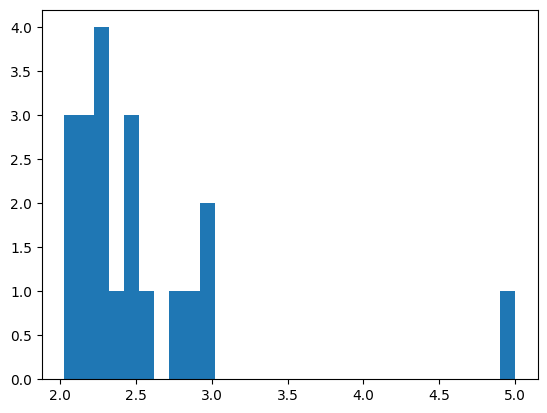

In [1]:
# 1) Generate an array array (with length=20) of standard deviations of random values following a uniform distribution 
# between 2 and 3. Fix the value of the last element = 5. The last point will be the outlier.

import numpy as np
import matplotlib.pyplot as plt


std_array = np.random.uniform(2, 3, 20)
std_array[-1] = 5
print(std_array)

plt.hist(std_array, bins=30)

In [5]:
#2) Generate an array, std-array, of 20 values following a gaussian distribution with a standard deviation defined 
# by the array generated in the previous 1). Replace the last point by a value correponding to +2.5 \sigma (you have the outlier generation).

sta_gaussian_array = np.random.normal(0, std_array)
sta_gaussian_array[-1] = 2.5 * std_array[-1]

print(sta_gaussian_array)

[-1.31304931  0.98324487 -0.04252471  0.81053021 -1.9812927   3.35501866
  0.17679708  2.28206971 -1.59633906  1.20288348  2.2074829  -3.21468426
 -0.32472607  1.9471088  -2.21029747 -3.66377866 -2.11242703 -1.21271698
 -2.98781375 12.5       ]


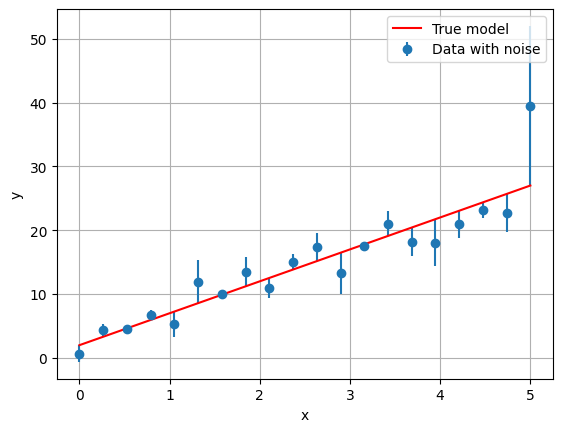

In [6]:
# 3) Generate an array of 20 values linearly spaced between 0 and 5 (your x-array)
x_array = np.linspace(0, 5, 20)


# 4) Generate the y-array to follow the relation y= a + bx + noise, wherre a=2, b=5 and 
#  noise corresponds to the  fluctuations you have generated in 2). 


def model(x, a, b):
    return a + b * x

true_model = model(x_array, 2, 5)
y_array = true_model + sta_gaussian_array


# 5) plot the data points

plt.errorbar(x_array, y_array, yerr=np.abs(sta_gaussian_array), fmt='o', label='Data with noise')
plt.plot(x_array, true_model, 'r-', label='True model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()


### 1.2 Use gradient descent for finding best values of a and b